# First import your libraries and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#use this code to download the files from the GitHub site
#YEARS=list(range(1998,2021))
#for i in YEARS:
#  data = pd.read_csv('https://github.com/guga31bb/nflfastR-data/blob/master/data/' \
#                         'play_by_play_' + str(i) + '.csv.gz?raw=True', compression='gzip', low_memory=False)
#  data.to_csv(f'{i} nfl data.csv', header=True) 

In [3]:
#use this code to export the files to your hard drive, if interested
#from google.colab import files
#for i in YEARS:
#  files.download(f'{i} nfl data.csv')

# Get all the data for only Safeties

In [4]:
YEARS=list(range(1999,2021))

safetydata = pd.DataFrame()

#loop through each csv file, import and filter where 'safety' == 1
for i in YEARS:
  dataset = pd.read_csv(f'{i} nfl data.csv')
  dataset=dataset.loc[(dataset['safety']==1)]
  safetydata = pd.concat([safetydata, dataset])
#reset the index
safetydata.reset_index(inplace=True, drop=True)

c:\users\aceli\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (37,38,180,181,190,191,198,199,204,205,206,207,214,215,219,220,221,223,225,227,249,250,254,255,256,261,263,264,267,268,269,270) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
c:\users\aceli\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (38,46,180,181,183,184,190,191,194,195,198,199,204,205,206,207,219,220,221,249,250,254,255,256,261,263,264) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
c:\users\aceli\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (38,180,181,183,184,190,191,194,195,198,199,204,205,206,207,210,211,214,215,21

Let's process some data sp we can run some analysis

In [5]:
#now we need to determine who done got safe- possession team or defense
#create a new column 'posteamscore' by getting there difference of the post team score and pos team score post
safetydata['posteamscore']=safetydata['posteam_score_post']-safetydata['posteam_score']
#if the pos team score differential is 2, the scoring team was the pos team
safetydata.loc[safetydata['posteamscore'] == 2, 'scoringteam'] = safetydata['posteam']
#if the score differential was 0, the scoring team was the def team
safetydata.loc[safetydata['posteamscore'] == 0, 'scoringteam'] = safetydata['defteam']

#if the pos team score differential is 2, the broken team was the pos team
safetydata.loc[safetydata['posteamscore'] == 2, 'brokenteam'] = safetydata['defteam']
#if the score differential was 0, the broken team was the def team
safetydata.loc[safetydata['posteamscore'] == 0, 'brokenteam'] = safetydata['posteam']

#game winner, losers, tie
safetydata.loc[safetydata['home_score'] > safetydata['away_score'], 'gamewinner'] = safetydata['home_team']
safetydata.loc[safetydata['home_score'] < safetydata['away_score'], 'gamewinner'] = safetydata['away_team']
safetydata.loc[safetydata['home_score'] == safetydata['away_score'], 'gamewinner'] = 'tie'

In [6]:
safetydata.head()

,Unnamed: 0,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,...,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe,posteamscore,scoringteam,brokenteam,gamewinner
0,603,1110,1999_01_CIN_TEN,1999091204,TEN,CIN,REG,1,CIN,away,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,TEN,CIN,TEN
1,1018,1407,1999_01_DET_SEA,1999091209,SEA,DET,REG,1,SEA,home,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,DET,SEA,DET
2,1752,1796,1999_01_NE_NYJ,1999091207,NYJ,NE,REG,1,NE,away,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NYJ,NE,NE
3,2943,595,1999_02_CLE_TEN,1999091911,TEN,CLE,REG,2,CLE,away,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,TEN,CLE,TEN
4,3385,2839,1999_02_GB_DET,1999091901,DET,GB,REG,2,DET,home,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,GB,DET,DET


# First let's see the total number of safeties per year

In [7]:
safety_by_year = dict(safetydata['season'].value_counts())
#need to sort the list since the keys are values
safety_by_year = {key: value for key, value in sorted(safety_by_year.items())}
safety_year=list(map(str,safety_by_year.keys()))
safety_year_count=list(safety_by_year.values())

In [8]:
print(sum(safety_year_count))

383


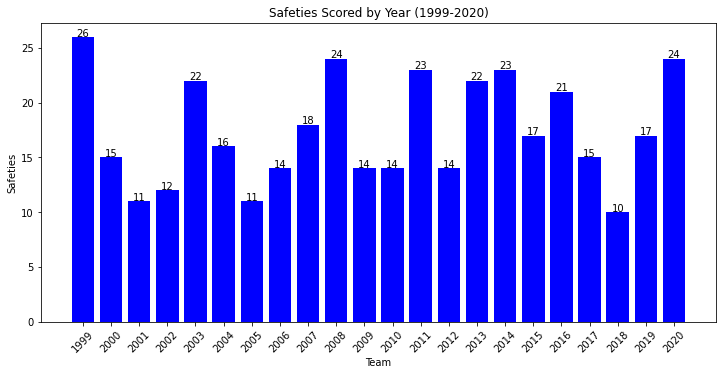

In [9]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+.08,"{:.0f}".format(y[i]), ha='center')

plt.bar(safety_year, safety_year_count, color = 'blue')
plt.title('Safeties Scored by Year (1999-2020)')
plt.xlabel('Team')
plt.ylabel('Safeties')
plt.xticks(rotation=45)
addlabels(safety_year, safety_year_count)
fig= plt.gcf()
fig.set_size_inches(15, 5.5)
plt.subplots_adjust(right=0.75)
plt.show()

As we can see, 1999 was dominated by the safety. What a year it was! Honorable mention in 2008 and 2020

# Now let's see what teams scored the most safeties

In [10]:
safety_by_team = dict(safetydata['scoringteam'].value_counts())
safety_teams=list(safety_by_team.keys())
safety_count=list(safety_by_team.values())

In [11]:
print(sum(safety_count))

383


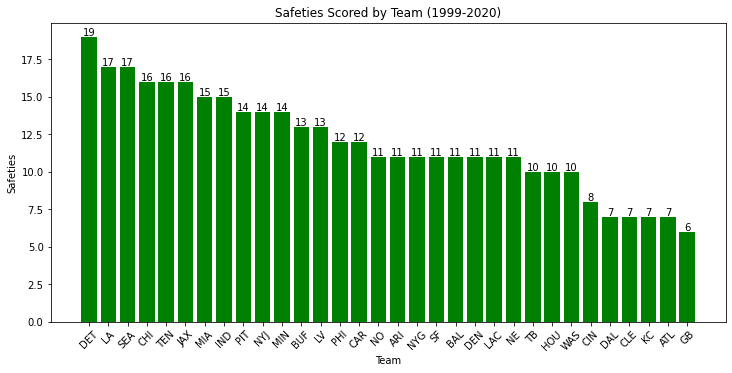

In [12]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+.08,"{:.0f}".format(y[i]), ha='center')

plt.bar(safety_teams, safety_count, color = 'green')
plt.title('Safeties Scored by Team (1999-2020)')
plt.xlabel('Team')
plt.ylabel('Safeties')
plt.xticks(rotation=45)
addlabels(safety_teams, safety_count)
fig= plt.gcf()
fig.set_size_inches(15, 5.5)
plt.subplots_adjust(right=0.75)
plt.show()

It looks like Detroit is the big winner over this time period! The Motor City is on it's way back!

# We all know giving up a safety is the ultimate back breaker. Who gave up the most safeties?

In [13]:
safety_to_team = dict(safetydata['brokenteam'].value_counts())
safety_to_teams=list(safety_to_team.keys())
safety_to_count=list(safety_to_team.values())

In [14]:
print(sum(safety_to_count))

383


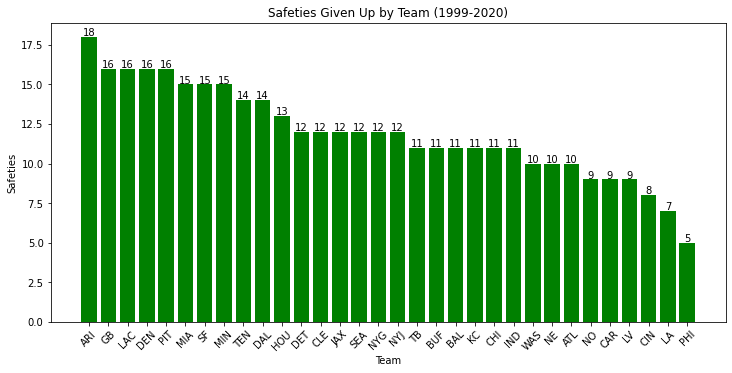

In [15]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+.08,"{:.0f}".format(y[i]), ha='center')

plt.bar(safety_to_teams, safety_to_count, color = 'green')
plt.title('Safeties Given Up by Team (1999-2020)')
plt.xlabel('Team')
plt.ylabel('Safeties')
plt.xticks(rotation=45)
addlabels(safety_to_teams, safety_to_count)
fig= plt.gcf()
fig.set_size_inches(15, 5.5)
plt.subplots_adjust(right=0.75)
plt.show()

Arizona with the weakest back and Philly with the strongest. This is an interesting dynamic because we should be rooting for the safety over any individual team. Does this mean we like Arizona more? 

Let's move on to the ratio of safeties scored compared to safeties given up. We all know the safety giveth and taketh, but at what rate per team?

In [16]:
#safety_ratio_dict = {k: float(safety_by_team[k])/safety_to_team[k] for k in safety_to_team}
safety_ratio_dict = {k: safety_by_team[k]/safety_to_team[k] for k in safety_to_team}
#sort the dictionary by values, decending
safety_ratio_dict=dict(sorted(safety_ratio_dict.items(), key=lambda x: x[1], reverse=True))

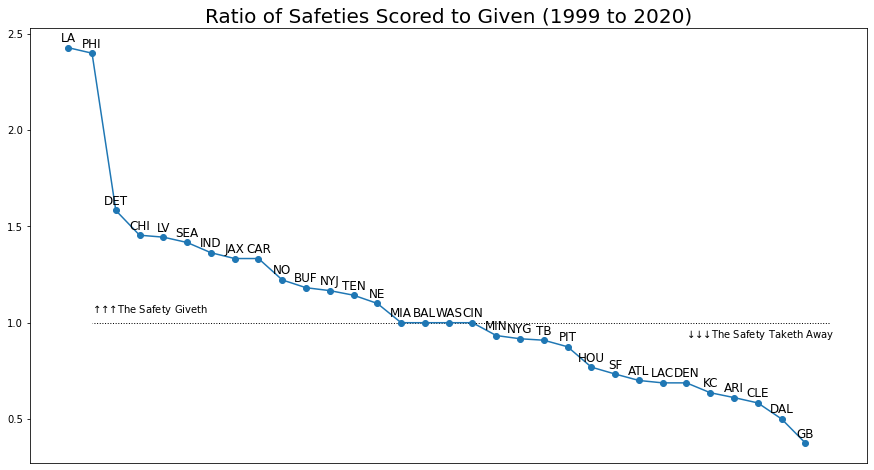

In [17]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+.03,x[i], ha='center', size=12)

data = {"x":[], "y":[], "label":[]}
for i, j in safety_ratio_dict.items():
    data["x"].append(i)
    data["y"].append(j)
    data["label"].append(i)
#downarrow = [u'\u2193']
uparrow = u'$\u2191$'
downarrow = u'$\u2193$'
# display scatter plot data
plt.figure(figsize=(15,8))
plt.title('Ratio of Safeties Scored to Given (1999 to 2020)', fontsize=20)
addlabels(data["x"], data["y"])
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)
plt.plot([32,1], [1,1], color='k', linestyle=':', linewidth=1)
plt.plot(data["x"], data["y"], marker = 'o')
plt.text(26,.92,str(downarrow) + str(downarrow) + str(downarrow) + 'The Safety Taketh Away', ha='left', size=10)
plt.text(1,1.05,str(uparrow) + str(uparrow) + str(uparrow) + 'The Safety Giveth', ha='left', size=10)
plt.show()

# Let's look at teams total safety involvement

In [18]:
#team totals on either side of safety
safety_total_team = dict(safetydata['scoringteam'].append(safetydata['brokenteam']).value_counts())
safety_total_teams=list(safety_total_team.keys())
safety_total_count=list(safety_total_team.values())

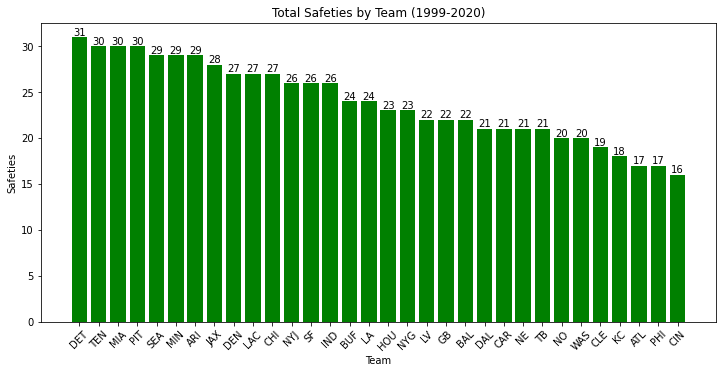

In [19]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+.20,"{:.0f}".format(y[i]), ha='center')
#convert LeagueYear to string
#LeagueYearS = list(map(str, LeagueYear))

plt.bar(safety_total_teams, safety_total_count, color = 'green')
plt.title('Total Safeties by Team (1999-2020)')
plt.xlabel('Team')
plt.ylabel('Safeties')
plt.xticks(rotation=45)
addlabels(safety_total_teams, safety_total_count)
fig= plt.gcf()
fig.set_size_inches(15, 5.5)
plt.subplots_adjust(right=0.75)
plt.show()

It's easy to think that, with a safety, there is a winner and a loser. But that doesnt consider the fan, who wins either way!

As if we needed any other reason to dislike Cincy. Fewest safeties either given up for scored. What a boring team to watch. Detroit is the most fun team to watch over this period (W-L record be damned!)

# Let's see where more safeties occur

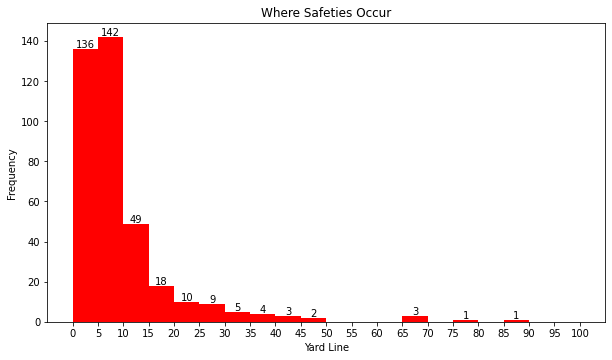

In [20]:
# function to add value labels
bins_list = np.arange(0, 105, 5).tolist()
counts, bins, bars= plt.hist(100-safetydata['yardline_100'], bins=bins_list)

def addlabels(x,y):
    for i,j in zip(x,y):
        if j != 0:
            plt.text(i+2.5,j+.5,"{:.0f}".format(j), ha='center')

bins_list = np.arange(0, 105, 5).tolist()
plt.hist(100-safetydata['yardline_100'], bins=bins_list, color='red')
plt.title('Where Safeties Occur')
plt.xlabel('Yard Line')
plt.ylabel('Frequency')
plt.xticks(ticks=bins_list)
addlabels(bins, counts)
fig= plt.gcf()
fig.set_size_inches(10, 5.5)
plt.show()

This yardline is given from the possessing team's field position from their end zone.

Zero to ten is the classic Safety Zone (SZ), with zero to five being plum in the zone.

Ten to fifteen is the teabag zone, for you are one sack away from being in the zone.

Clearly we should all be excited when a team enters any of these zones.

Note the long safeties. Three from 65 to 70 yards. One from 75 to 80 yards. ONE FROM 85 TO 90 YARDS?!
What is going on here?

In [21]:
longsafeties = safetydata.loc[safetydata['yardline_100'] < 50]
pd.options.display.max_colwidth = 1000
print(longsafeties['desc'])

10                                                                                                                                                                                                                                                                                                                                                                                                 (6:36) D.Pederson pass intended for T.Small INTERCEPTED by J.Sehorn at NYG 4. J.Sehorn to NYG 6 for 2 yards. FUMBLES, recovered by NYG-P.Sparks at NYG 0. P.Sparks tackled in End Zone, SAFETY (C.Johnson).
177                                                                                                                                                                                                                                                                                                                                                                                                                      

All this safety talk has me thinking: were there any games with multiple safeties? The spirit of Dryer compels it!

In [22]:
print(str(len(safetydata)) + ' total safeties between 1999 and 2020')
print(str(len(pd.unique(safetydata['game_id']))) + ' total unique game IDs between 1999 and 2020')

383 total safeties between 1999 and 2020
375 total unique game IDs between 1999 and 2020


In [23]:
multisafetygameids = list(safetydata['game_id'].loc[safetydata['game_id'].duplicated()])
multisafetygames = safetydata[safetydata['game_id'].isin(multisafetygameids)]

In [24]:
multisafetygames.groupby(['game_id','scoringteam']).size()

game_id          scoringteam
1999_04_JAX_PIT  JAX            2
2003_05_ARI_DAL  DAL            2
2003_05_MIN_ATL  MIN            2
2003_11_HOU_BUF  BUF            2
2008_10_GB_MIN   MIN            2
2011_09_STL_ARI  LA             2
2017_13_DEN_MIA  MIA            2
2019_09_NYJ_MIA  MIA            1
                 NYJ            1
dtype: int64

So of the 8 games with multiple safeties, 7 had the two safeties scored by the same team.
Sadly, there is no 3 safetey games over this time period.

# Is the safety REALLY the back breaker?
This is a question that keeps Safety First and all mankind up at night. Do safeties result in wins?

In [25]:
#create a dataframe selecting from the multi game dataframe the rows where the game id is not the split and scoring team is not the winning team
multigamesafetylosers= multisafetygames[['game_id','scoringteam','gamewinner']].loc[(multisafetygames['game_id'] != '2019_09_NYJ_MIA') 
                     & (multisafetygames['scoringteam'] != multisafetygames['gamewinner'])]
#create a dataframe selecting from the multi game dataframe the rows where the game id is not the split and scoring team is the winning team
multigamesafetywinners= multisafetygames[['game_id','scoringteam','gamewinner']].loc[(multisafetygames['game_id'] != '2019_09_NYJ_MIA') 
                     & (multisafetygames['scoringteam'] == multisafetygames['gamewinner'])]
#drop duplicate rows
multigamesafetywinners = multigamesafetywinners.drop_duplicates()
multigamesafetylosers = multigamesafetylosers.drop_duplicates()
print('Games where the team with multiple safeties won\n')
print(multigamesafetywinners)
print('\nGames where the team with multiple safeties lost\n')
print(multigamesafetylosers)

Games where the team with multiple safeties won

             game_id scoringteam gamewinner
8    1999_04_JAX_PIT         JAX        JAX
68   2003_05_ARI_DAL         DAL        DAL
70   2003_05_MIN_ATL         MIN        MIN
157   2008_10_GB_MIN         MIN        MIN
326  2017_13_DEN_MIA         MIA        MIA

Games where the team with multiple safeties lost

             game_id scoringteam gamewinner
76   2003_11_HOU_BUF         BUF        HOU
206  2011_09_STL_ARI          LA        ARI


Of the 8 games with multiple safeties<br>
5 teams with 2 safeties won<br>
2 teams with 2 safeties lost<br>
1 game had the safety scored by both teams

In [26]:
#make a dataframe filtering where the game_id is NOT (~) in the multi safety list and scoring team = gamewinner
singlegamesafetywinners= safetydata[['game_id','scoringteam','gamewinner']].loc[(~safetydata['game_id'].isin(multisafetygameids)) 
                     & (safetydata['scoringteam'] == safetydata['gamewinner'])]
#make a dataframe filtering where the game_id is NOT (~) in the multi safety list and scoring team is not gamewinner
singlegamesafetylosers= safetydata[['game_id','scoringteam','gamewinner']].loc[(~safetydata['game_id'].isin(multisafetygameids)) 
                     & (safetydata['scoringteam'] != safetydata['gamewinner'])]
print('Number of games with a single safety where the scoring team won: ' + str(len(singlegamesafetywinners)))
print('Number of games with a single safety where the scoring team lost: ' + str(len(singlegamesafetylosers)))


Number of games with a single safety where the scoring team won: 240
Number of games with a single safety where the scoring team lost: 127


There we have it.<br>
Between 1999 and 2020 there were 383 safeties scored in 375 games.<br>
In 245 games, the scoring team won for a winning percentage of 65.5%<br>
In 129 games, the scoring team lost for a losing percentage of 34.5%<br>
The denominator excludes the one game where both teams scored a safety.


# What was the margin of victory for games with a safety?

1
43


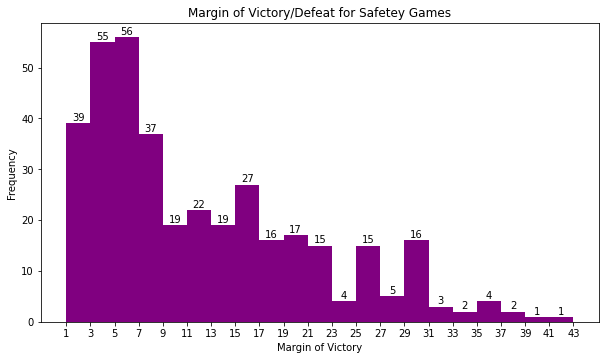

In [27]:
safetydata['absresult']= safetydata['result'].abs()
print(min(safetydata['absresult']))
print(max(safetydata['absresult']))

pointmargin = safetydata[['game_id','absresult']]
pointmargin= pointmargin.drop_duplicates()# function to add value labels

bins_list = np.arange(1, 45,2).tolist()
counts, bins, bars= plt.hist(pointmargin['absresult'], bins=bins_list)

def addlabels(x,y):
    for i,j in zip(x,y):
        if j != 0:
            plt.text(i+1,j+.5,"{:.0f}".format(j), ha='center')

plt.hist(pointmargin['absresult'], bins=bins_list, color='purple')
plt.title('Margin of Victory/Defeat for Safetey Games')
plt.xlabel('Margin of Victory')
plt.ylabel('Frequency')
plt.xticks(ticks=bins_list)
addlabels(bins, counts)
fig= plt.gcf()
fig.set_size_inches(10, 5.5)
plt.show()

Whoa, 39 games where the margin of victory is <3. How many of those games were directly related to the safety?

In [28]:
winsby2= safetydata[['game_id','scoringteam','gamewinner','absresult']].loc[(safetydata['absresult']<3)]
winsby2 = winsby2.drop_duplicates()
winsby2.head()
safetywinsby2 = winsby2.loc[(winsby2['scoringteam'] == winsby2['gamewinner'])]
safetylossesby2 = winsby2.loc[(winsby2['scoringteam'] != winsby2['gamewinner'])]

print('Of the 39 games with a Safety where the margin of victory was 2 or less, the safety scoring team won ' + str(len(safetywinsby2)))

Of the 39 games with a Safety where the margin of victory was 2 or less, the safety scoring team won 22


We need to understand of those games, which ones had the safety as the last score!

In [29]:
columns=['game_id','away_score','home_score','defteam_score_post','posteam_score_post','scoringteam','posteam_type','posteam','defteam','defteam_score','posteam_score']
winsby2 = list(safetywinsby2['game_id'])
closewins= safetydata[columns].loc[safetydata['game_id'].isin(winsby2)]
closewins['maxscore']= closewins[['away_score','home_score']].max(axis=1)

In [30]:
closewins['game_id'].loc[(closewins['defteam_score_post'] == closewins['maxscore']) | 
                  (closewins['posteam_score_post'] == closewins['maxscore'])]

91     2004_10_CHI_TEN
113     2006_01_BUF_NE
245    2013_09_CIN_MIA
273    2014_16_MIN_MIA
Name: game_id, dtype: object

These are probably the most important in NFL history